## Proyecto de Análisis de Datos con Pandas

Irma Carolina Ruiz

Programación II - TUIA

**Construcción de dataset de análisis**

Se cargan los datasets seleccionados del Sistema de Información Turística de Argentina

In [4]:
import pandas as pd

dataset1 = "viajeros-hospedados-residentes-y-no-residentes-por-destino.csv"
datos1 = pd.read_csv(dataset1)
cant_viajeros_res_nores = datos1.iloc[:, :4]

In [6]:
dataset2 = "estadia-media-residentes-y-no-residentes-por-destino.csv"
datos2 = pd.read_csv(dataset2)
estadia_media_res_nores = datos2.iloc[:, :4]

In [8]:
dataset3 = "tasas-de-ocupacion-plazas-por-region-y-categoria.csv"
datos3 = pd.read_csv(dataset3)
tasas_ocup_plazas = datos3.iloc[:, :4]

In [10]:
dataset4 = "tasas-de-ocupacion-habitacion-por-region-y-categoria.csv"
datos4 = pd.read_csv(dataset4)
tasas_ocup_habit = datos4.iloc[:, :4]

In [12]:
dataset5 = "facturacion-total-en-pesos-por-region-y-categoria.csv"
datos5 = pd.read_csv(dataset5)
factu_region_categ = datos5.iloc[:, :4]

In [14]:
data1 = cant_viajeros_res_nores.merge(estadia_media_res_nores, on=['indice_tiempo', 'region_de_destino', 'origen_viajeros'], how='outer')

In [16]:
data2 = tasas_ocup_plazas.merge(tasas_ocup_habit, on=['indice_tiempo', 'region_de_destino', 'categoria_del_hotel'], how='outer').merge(factu_region_categ, on=['indice_tiempo', 'region_de_destino', 'categoria_del_hotel'], how='outer')

---------------------------------------

**Dataset definitivo**

In [18]:
# Se unen las dos partes del dataset definitivo, a pesar de que no todos los registros coincidan, a través de merge
data = data1.merge(data2, on=['indice_tiempo', 'region_de_destino'], how='outer')
# Se asegura que la columna indice_tiempo tenga el formato datetime
data['indice_tiempo'] = pd.to_datetime(data['indice_tiempo'])
data.head()

,indice_tiempo,region_de_destino,origen_viajeros,viajeros,estadia_media_en_noches,categoria_del_hotel,tasa_de_ocupacion_plazas,tasa_de_ocupacion_habitaciones,facturacion_total_en_pesos
0,2007-01-01,Buenos Aires,Residentes,401221.0,5.3,NaN,NaN,NaN,NaN
1,2007-01-01,Buenos Aires,No residentes,12889.0,3.8,NaN,NaN,NaN,NaN
2,2007-01-01,Buenos Aires,Total,NaN,5.3,NaN,NaN,NaN,NaN
3,2007-01-01,CABA,Residentes,139181.0,2.3,NaN,NaN,NaN,NaN
4,2007-01-01,CABA,No residentes,196750.0,2.4,NaN,NaN,NaN,NaN


______________________________

In [20]:
import matplotlib.pyplot as plt

**¿Cómo fue la evolución del número de viajeros residentes entre 2020 y 2024? ¿Cuáles fueron las regiones más populares en el tiempo?**

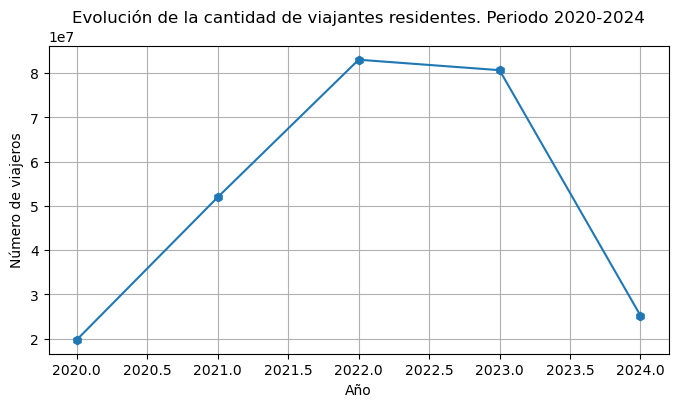

In [22]:
tiempo_filtrado = data[(data['indice_tiempo'].dt.year >= 2020) & (data['indice_tiempo'].dt.year <= 2024)]
viajeros_resid = tiempo_filtrado[tiempo_filtrado['origen_viajeros'] == 'Residentes']

# Se copia del DataFrame filtrado para evitar SettingWithCopyWarning
# viajeros_resid queda igual para solo modificar su copia

viajeros_resid = viajeros_resid.copy()
# Se agrega columna "year" basada en "indice_tiempo"
viajeros_resid['year'] = viajeros_resid['indice_tiempo'].dt.year

# Cada año tiene la suma de viajeros
viaj_x_ano = viajeros_resid.groupby('year')['viajeros'].sum()

# Gráfico
plt.figure(figsize=(8, 4))
viaj_x_ano.plot(kind='line', marker='h')
plt.title('Evolución de la cantidad de viajantes residentes. Periodo 2020-2024')
plt.xlabel('Año')
plt.ylabel('Número de viajeros')
plt.grid(True)


plt.savefig('grafico1.jpg')
plt.show()

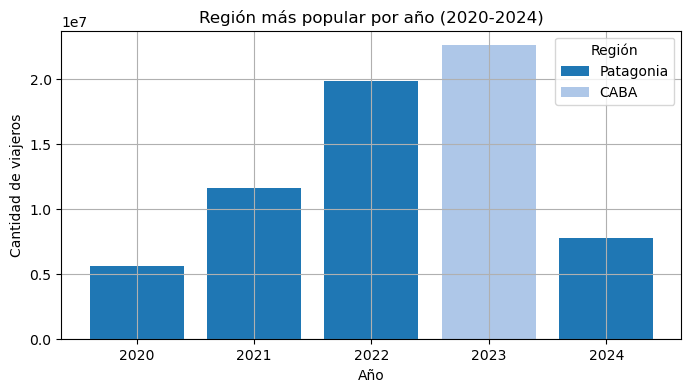

In [24]:
tiempo_filtrado = tiempo_filtrado.copy()

# Se agrega la columna 'year'
tiempo_filtrado['year'] = tiempo_filtrado['indice_tiempo'].dt.year

# Se agrupa por año y región, luego se suman los viajeros
region_x_ano_filtrado = tiempo_filtrado.groupby(['year', 'region_de_destino'])['viajeros'].sum().reset_index()

# Región más popular por año
idx_year_max_viaj = region_x_ano_filtrado.groupby('year')['viajeros'].idxmax()
regiones_populares = region_x_ano_filtrado.loc[idx_year_max_viaj]

# Gráfico
# Colores distintos para cada región
regiones = regiones_populares['region_de_destino'].unique()
colores = plt.cm.tab20(range(len(regiones)))
color_dict = dict(zip(regiones, colores))

plt.figure(figsize=(8, 4))
for year in regiones_populares['year'].unique():
    region = regiones_populares[regiones_populares['year'] == year]
    plt.bar(year, region['viajeros'].values[0], label=region['region_de_destino'].values[0], color=color_dict[region['region_de_destino'].values[0]])

# Se evitan duplicados en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Región')

plt.title('Región más popular por año (2020-2024)')
plt.xlabel('Año')
plt.ylabel('Cantidad de viajeros')
plt.xticks(regiones_populares['year'].unique())
plt.grid(True)

plt.savefig('grafico2.jpg')
plt.show()

Teniendo en cuenta los dos gráficos anteriores, se puede afirmar que el pico de turismo de verano fue en 2022. Cabe destacar que los datos del año 2024 están actualizados hasta abril. Las zonas más fuertes son la Patagonia y CABA. Se puede afirmar, en primera instancia, que estas zonas no necesitan ayuda estatal para fomentar su turismo.

**Dentro del periodo de las vacaciones de verano del 2020-2021, ¿cómo fue la tasa de ocupación hotelera? ¿El levantamiento de las etapas de la cuarentena ayudó a su incremento con el tiempo?**

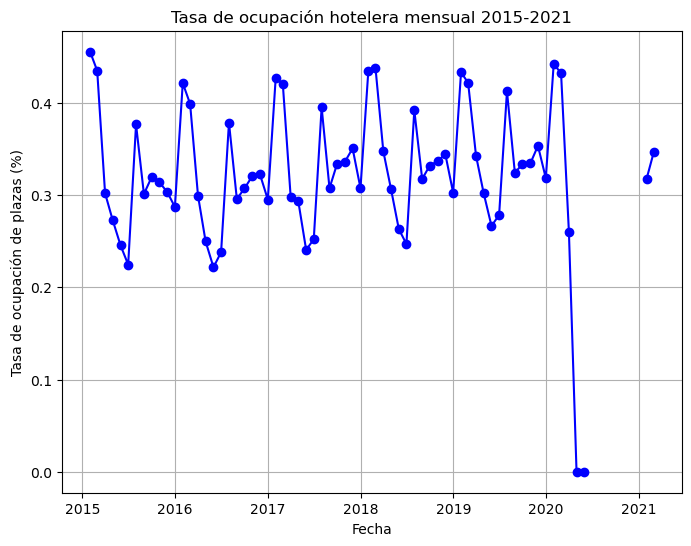

In [27]:
# Se decide mostrar el proceso del turismo del 2015 al 2021 para contrastar con más énfasis con el periodo 2020-2021
pre_post_cuarent_2020 = data[(data['indice_tiempo'] <= '2021-02-01') & (data['indice_tiempo'] >= '2015-01-01')]

# Se mostrarán los datos de forma mensual, teniendo en cuenta la columna indice_tiempo
tasa_ocup_pre2020 = pre_post_cuarent_2020.resample('M', on='indice_tiempo')['tasa_de_ocupacion_plazas'].mean()

# Gráfico de la tasa de ocupación hotelera mensual
plt.figure(figsize=(8, 6))
plt.plot(tasa_ocup_pre2020.index, tasa_ocup_pre2020.values, marker='o', linestyle='-', color='blue')
plt.title('Tasa de ocupación hotelera mensual 2015-2021')
plt.xlabel('Fecha')
plt.ylabel('Tasa de ocupación de plazas (%)')
plt.grid(True)

plt.savefig('grafico3.jpg')
plt.show()


Se debe tener en cuenta que el turismo comienza a tener normalidad entre noviembre y diciembre de 2020, etapa que no hubo actividad de ningún tipo. Se observa que la ocupación va creciendo de a poco, paralalamente a la apertura del turismo, ya en el 2021.

**Teniendo en cuenta el punto anterior, ¿cuál es la región del país que menos facturación tuvo durante
ese periodo? ¿Hubo algún cambio de preferencia este año 2024?**

*Regiones divididas en recaudación - verano 2020-2021*

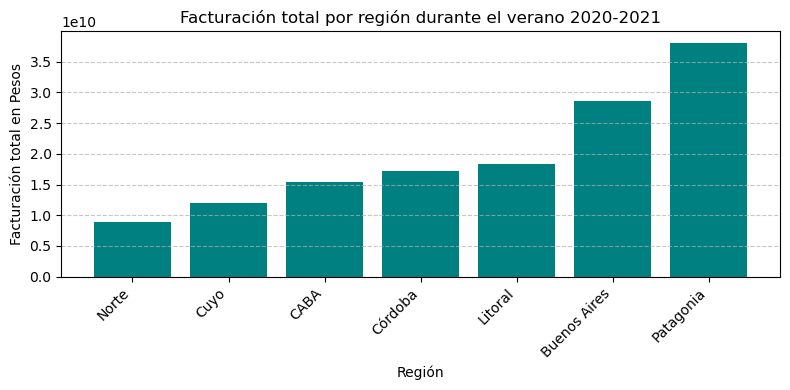

In [31]:
# Se toman los datos relacionados al verano 2020-2021
vacac_2020_2021 = data[(data['indice_tiempo'] <= '2021-03-01') & (data['indice_tiempo'] >= '2020-01-01')]

# Facturación verano 2020-2021, por regiones
fact_x_region = vacac_2020_2021.groupby('region_de_destino')['facturacion_total_en_pesos'].sum().reset_index()
region_menor_fact = fact_x_region.loc[fact_x_region['facturacion_total_en_pesos'].idxmin()]
fact_x_region = fact_x_region.sort_values(by='facturacion_total_en_pesos')

# Gráfico de la facturación total por región - verano 2020-2021
plt.figure(figsize=(8, 4))
plt.bar(fact_x_region['region_de_destino'], fact_x_region['facturacion_total_en_pesos'], color='teal')
plt.title('Facturación total por región durante el verano 2020-2021')
plt.xlabel('Región')
plt.ylabel('Facturación total en Pesos')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('grafico4.jpg')
plt.show()


Como se supuso antes, la Patagonia se mantuvo como la región más fuerte del 2020-2021. Con base a este gráfico, se decide tener en cuenta el Norte y Cuyo en siguientes análisis como posibles regiones candidatas a la ayuda por parte del Estado.

*Regiones según recaudación en el verano 2024*

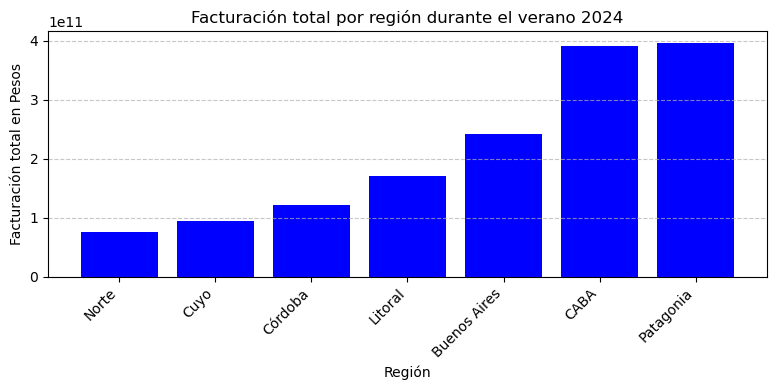

In [38]:
# Verano 2024
ocup_24 = data[(data['indice_tiempo'] >= '2024-01-01') & (data['indice_tiempo'] <= '2024-03-01')]

fact_x_region_2024 = ocup_24.groupby('region_de_destino')['facturacion_total_en_pesos'].sum().reset_index()
fact_x_region_2024 = fact_x_region_2024.sort_values(by='facturacion_total_en_pesos')

# Gráfico de la facturación total por región - verano 2024
plt.figure(figsize=(8, 4))
plt.bar(fact_x_region_2024['region_de_destino'], fact_x_region_2024['facturacion_total_en_pesos'], color='blue')
plt.title('Facturación total por región durante el verano 2024')
plt.xlabel('Región')
plt.ylabel('Facturación total en Pesos')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('grafico5.jpg')
plt.show()

Como primera observación general, se demuestra que hay más recaudación. CABA demostró mucha mejora, posicionándose detrás de la Patagonia. Como en el gráfico anterior, esta última región se mantiene como la que posee más recaudación actualmente. Como se supuso, el Norte y Cuyo podrían ser dos sectores que podrían fomentarse con políticas públicas. Se podría evaluar si Córdoba es un caso similar a aquellos dos.

*Cantidad de viajeros en Cuyo, el Norte y Córdoba en el tiempo (2022-2024)*

In [42]:
periodo_2022_2024 = data[(data['indice_tiempo'] >= '2022-01-01') & (data['indice_tiempo'] <= '2024-03-01')]

# Solo se evaluará los datos relacionados a Cuyo, el Norte y Córdoba en el periodo post pandemia
ncc_22_24 = periodo_2022_2024[(periodo_2022_2024['region_de_destino'] == 'Cuyo') | 
                    (periodo_2022_2024['region_de_destino'] == 'Norte') |
                    (periodo_2022_2024['region_de_destino'] == 'Córdoba')]

# Dataframe con tiempo, region y cant. de viajeros
viaj_x_tiempo = ncc_22_24.groupby(['indice_tiempo', 'region_de_destino'])['viajeros'].sum().unstack()

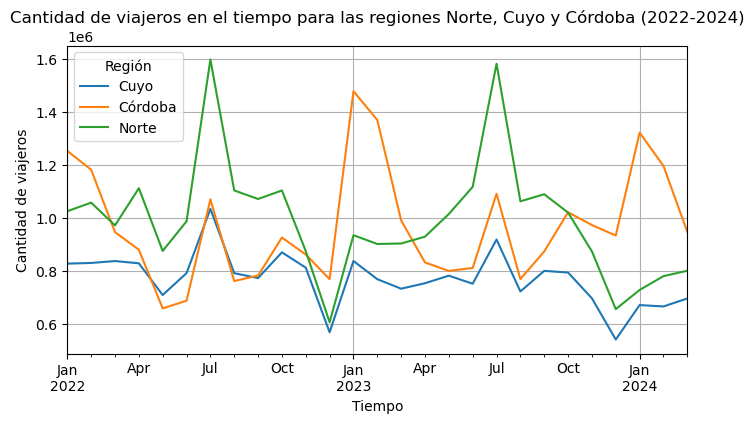

In [46]:
# Gráfico
viaj_x_tiempo.plot(kind='line', figsize=(8, 4))
plt.title('Cantidad de viajeros en el tiempo para las regiones Norte, Cuyo y Córdoba (2022-2024)')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de viajeros')
plt.legend(title='Región')
plt.grid(True)

plt.savefig('grafico6.jpg')
plt.show()

En base a este último gráfico, se observa que Córdoba ha sufrido picos bajos en los dos últimos años pero la cantidad de viajeros que obtiene resulta positiva sobre todo en temporadas fuertes como vacaciones de invierno y verano (siendo el del 2023 su pico más fuerte). 

Por otro lado, si se vuelve a observar el tercer gráfico de este análisis, se considera que la ayuda al turismo debería estar más enfocada en la temporada de verano, ya que es más larga y por eso, hay más viajeros. En este sentido, tanto el Norte como Cuyo han sufrido caídas muy fuertes en estos dos últimos años. Se pueden elegir estas regiones para evaluarlas más como candidatas posibles a la ayuda estatal.

**En el Norte y en Cuyo, ¿qué categorías de hotel muestran un crecimiento constante en facturación y cuáles no?**

In [49]:
# Solo se evaluarán los datos del Norte y Cuyo
norte_cuyo = ncc_22_24[ncc_22_24['region_de_destino'].isin(['Norte', 'Cuyo'])]

# Por ser datos que no aportan nada, se sacan los datos almacenados como "total"
norte_cuyo = norte_cuyo[norte_cuyo['categoria_del_hotel'] != 'Total']
hotel_nc = norte_cuyo.groupby(['indice_tiempo','region_de_destino', 'categoria_del_hotel'])['facturacion_total_en_pesos'].sum().reset_index()

In [51]:
# Se parte de la hipótesis de que diciembre es el mes más débil para Cuyo y el Norte (visto en el gráfico anterior)
diciem_norte_cuyo = norte_cuyo[(norte_cuyo['indice_tiempo'].dt.month == 12)]

# Agrupar los datos por índice de tiempo, región de destino y categoría del hotel
hotel_nc = diciem_norte_cuyo.groupby(['indice_tiempo', 'region_de_destino', 'categoria_del_hotel'])['facturacion_total_en_pesos'].sum().reset_index()

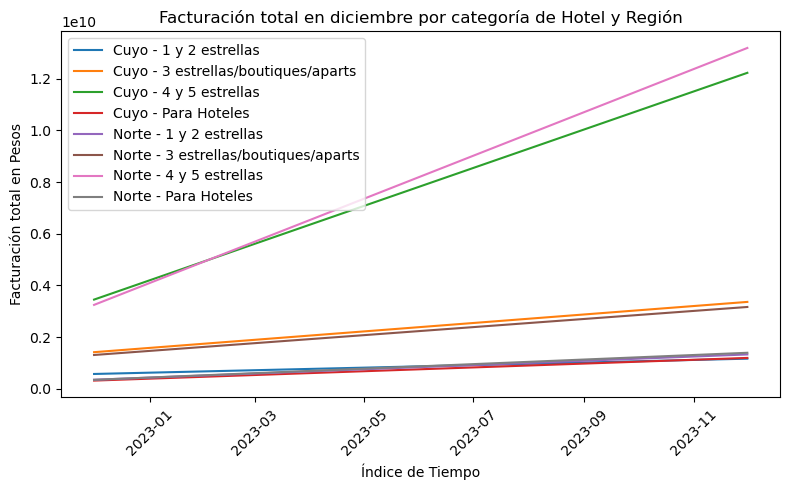

In [53]:
# Se calcula el cambio porcentual entre el valor actual y el valor anterior en facturacion_total_en_pesos para cada alojamiento
hotel_nc['crecim_fact'] = hotel_nc.groupby(['region_de_destino', 'categoria_del_hotel'])['facturacion_total_en_pesos'].pct_change()

# Gráfico separado por alojamiento
fig, ax = plt.subplots(figsize=(8, 5))

for (region, categoria), data in hotel_nc.groupby(['region_de_destino', 'categoria_del_hotel']):
    ax.plot(data['indice_tiempo'], data['facturacion_total_en_pesos'], label=f'{region} - {categoria}')

ax.set_xlabel('Índice de Tiempo')
ax.set_ylabel('Facturación total en Pesos')
ax.legend()
ax.set_title('Facturación total en diciembre por categoría de Hotel y Región')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('grafico7.jpg')
plt.show()

Se observa que el fuerte tanto de Cuyo como del Norte en los meses de diciembre son los hoteles más caros (4 y 5 estrellas). Se procederá a seguir evaluando los alojamientos más baratos para detectar comportamientos más concretos.

**¿Qué tipo de viajeros reciben el Norte y Cuyo?**

In [57]:
# Se descarta el valor que no da aportes: total
norte_cuyo = norte_cuyo[norte_cuyo['origen_viajeros'] != 'Total']

# Solo se analizan los alojamientos más baratos
hotel_viaj_nc = norte_cuyo[norte_cuyo['categoria_del_hotel'].isin(['1 y 2 estrellas', '3 estrellas/boutiques/aparts', 'Para Hoteles'])]

In [59]:
hotel_viaj_nc = hotel_viaj_nc.groupby(['region_de_destino', 'origen_viajeros'])['viajeros'].sum().reset_index()

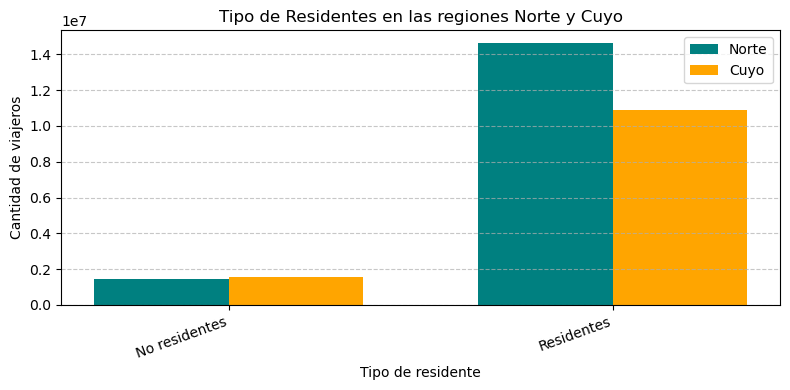

In [61]:
viaj_res_nores = hotel_viaj_nc.groupby(['origen_viajeros', 'region_de_destino']).sum().unstack()
#Se simplifican los niveles para usar bien las regiones
viaj_res_nores.columns = viaj_res_nores.columns.droplevel()

plt.figure(figsize=(8, 4))

# Barras para cada región
bar_width = 0.35
index = range(len(viaj_res_nores.index))  # Índices para las barras

# Barras para el Norte
plt.bar(index, viaj_res_nores['Norte'], bar_width, label='Norte', color='teal')

# Barras para Cuyo
plt.bar([i + bar_width for i in index], viaj_res_nores['Cuyo'], bar_width, label='Cuyo', color='orange')

# Gráfico
plt.title('Tipo de Residentes en las regiones Norte y Cuyo')
plt.xlabel('Tipo de residente')
plt.ylabel('Cantidad de viajeros')
plt.xticks([i + bar_width / 2 for i in index], viaj_res_nores.index, rotation=20, ha='right')
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('grafico8.jpg')
plt.show()

Este gráfico afirma que toda promoción que se quiera hacer, debe afectar a los residentes ya que son el mayor público del Norte y Cuyo.

**¿Cuáles son las tazas de ocupación hechas por residentes en cada zona y en qué tipo de alojamiento?**

In [64]:
# Solo se seleccionan los registros relacionados a los residentes
norte_cuyo_total = norte_cuyo[(norte_cuyo['region_de_destino'].isin(['Norte', 'Cuyo'])) & (norte_cuyo['origen_viajeros'] == 'Residentes')]

In [66]:
# Se calculan los promedios mensuales de ocupación de plazas (unidades hoteleras), por residentes 
variac_tempo_nc = norte_cuyo_total.set_index('indice_tiempo').groupby('region_de_destino').resample('M')['tasa_de_ocupacion_plazas'].mean().reset_index()

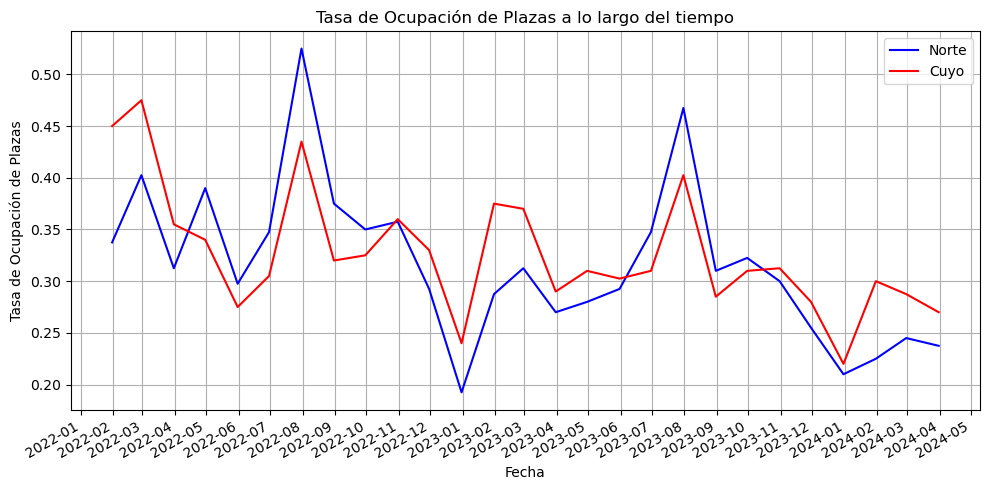

In [68]:
# Modulo para trabajar con fechas más específicas
import matplotlib.dates as mdates

plt.figure(figsize=(10, 5))

# Crear una línea para la región Norte
data_norte = variac_tempo_nc[variac_tempo_nc['region_de_destino'] == 'Norte']
plt.plot(data_norte['indice_tiempo'], data_norte['tasa_de_ocupacion_plazas'], label='Norte', color='blue')

# Crear una línea para la región Cuyo
data_cuyo = variac_tempo_nc[variac_tempo_nc['region_de_destino'] == 'Cuyo']
plt.plot(data_cuyo['indice_tiempo'], data_cuyo['tasa_de_ocupacion_plazas'], label='Cuyo', color='red')

# Configuración del gráfico
plt.title('Tasa de Ocupación de Plazas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Ocupación de Plazas')

# Configuración detallada del eje x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Marca cada mes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de fecha: Año-Mes

plt.gcf().autofmt_xdate()  # Rotar fechas para mejor visibilidad

plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('grafico9.jpg')
plt.show()

Se confirma que los veranos son los puntos más bajos para el Norte y Cuyo, tanto en cantidad de viajeros sin distinción (visto anteriormente) como en ocupación de plazas entre residentes.

*Alojamientos de Cuyo y el Norte que podrían fortalecerse*

In [71]:
res_nc = norte_cuyo[(norte_cuyo['origen_viajeros'] != 'Total') & (norte_cuyo['origen_viajeros'] != 'No residentes')]

# Se calculan tasas de ocupación de unidades y habitaciones, además de la facturación por tipo de alojamiento
res_ocup_rc = res_nc.groupby(['region_de_destino', 'categoria_del_hotel']).agg(
    {'tasa_de_ocupacion_habitaciones': 'mean', 'tasa_de_ocupacion_plazas': 'mean', 'facturacion_total_en_pesos': 'sum'})
tazas_ocup_nc = res_ocup_rc.sort_values(by=['region_de_destino', 'facturacion_total_en_pesos'])
tazas_ocup_nc = tazas_ocup_nc.reset_index()

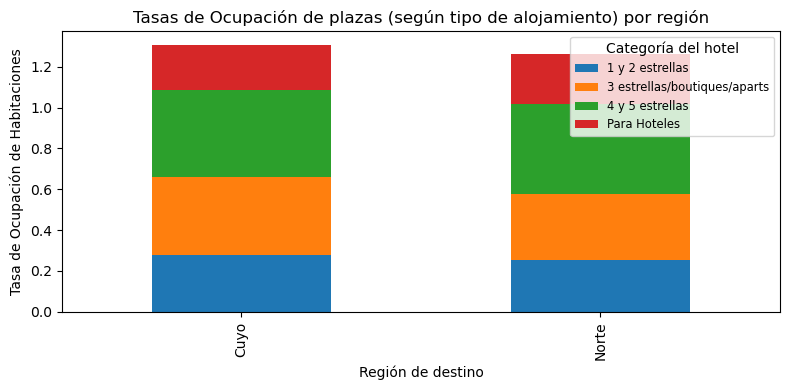

In [73]:
plt.figure(figsize=(8, 4))

tazas_ocup_nc.pivot(index='region_de_destino', columns='categoria_del_hotel', values='tasa_de_ocupacion_plazas').plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Región de destino')
plt.ylabel('Tasa de Ocupación de Habitaciones')
plt.title('Tasas de Ocupación de plazas (según tipo de alojamiento) por región')
plt.legend(title='Categoría del hotel', fontsize='small')

plt.tight_layout()

plt.savefig('grafico10.jpg')
plt.show()


**Conclusión**: el Norte y Cuyo son dos regiones que se han debilitados tras la pandemia por COVID. Este impacto se mantiene hasta la actualidad, o al menos se puede afirmar que otras regiones han crecido más que estas, en comparación. 

Par revertir esta situación, la actual secretaría de Turismo podría ofrecer descuentos a residentes en la temporada de verano, sobre todo para ocupar alojamientos de 1 y 2 estrellas o parahoteles, los cuales son los menos elegidos en dicha temporada. Esta hipótesis podría conducir a la secretaría en enfocarse en turistas residentes jóvenes que deseen visitar estas zonas con posibilidades de menos gastos.

Detalle:

- Tasa de ocupación de habitaciones (TOH): cociente entre las habitaciones o unidades
ocupadas sobre las habitaciones o unidades disponibles, en términos porcentuale.
- 
Tasa de ocupación de plazas (TOP): cociente entre plazas ocupadas sobre las plazas
disponibles, en términos porcentuales